***Forbes_Billionaires_Analysis***

**Importing librari**

In [9]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
%matplotlib inline
import plotly.express as px


In [10]:
# Colors using in project 

colors = ["#54bebe", "#76c8c8", "#98d1d1", "#badbdb", "#dedad2", "#e4bcad", "#df979e", "#d7658b", "#c80064"]

In [11]:
# Reading data

df = pd.read_csv('forbes_billionaires_geo.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         2755 non-null   object 
 1   NetWorth     2755 non-null   float64
 2   Country      2755 non-null   object 
 3   Source       2755 non-null   object 
 4   Rank         2755 non-null   int64  
 5   Age          2630 non-null   float64
 6   Residence    2715 non-null   object 
 7   Citizenship  2739 non-null   object 
 8   Status       2090 non-null   object 
 9   Children     1552 non-null   float64
 10  Education    1409 non-null   object 
 11  Self_made    2737 non-null   object 
 12  geometry     2755 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 279.9+ KB


In [13]:
df.isnull().sum()

Name              0
NetWorth          0
Country           0
Source            0
Rank              0
Age             125
Residence        40
Citizenship      16
Status          665
Children       1203
Education      1346
Self_made        18
geometry          0
dtype: int64

In [14]:
df.sample(5)

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made,geometry
692,Martin Lau,4.2,Hong Kong,e-commerce,680,48.0,"Hong Kong, Hong Kong",Hong Kong,NaN,NaN,"Master of Business Administration, Kellogg Sch...",True,POINT (114.1628131 22.2793278)
884,Julia Thiele-Schuerhoff,3.5,Germany,brakes,859,NaN,NaN,Germany,NaN,NaN,NaN,False,POINT (10.4234469 51.0834196)
144,Mike Cannon-Brookes,14.2,Australia,software,145,41.0,"Sydney, Australia",Australia,Married,2.0,"Bachelor of Arts/Science, University of New So...",True,POINT (151.0979607 -33.8641922)
2363,Xia Shudong,1.3,China,IT service,2263,48.0,"Beijing, China",China,NaN,NaN,"Doctorate, Beijing University",True,POINT (116.3912757 39.906217)
2356,Tang Zhuang,1.3,United States,electronics,2263,48.0,"Wuxi, China",United States,NaN,NaN,"Bachelor of Arts/Science, Peking University; D...",True,POINT (120.3074357 31.4933074)


**Data correction**

*Lower letters for all column*

*Drop Coulumns: Residence and Citizenship*

*Changing Nan to 0*


In [15]:
def column_update(name):
    return name.lower().replace('_', '')

In [16]:
df = df.fillna(0)

In [20]:
def data_update(df):
    return(df
           .rename(columns=column_update)
           .drop(['residence', 'citizenship'], axis = 1)
           )

df2 = data_update(df)
df2

,name,networth,country,source,rank,age,status,children,education,selfmade,geometry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",True,POINT (-122.3300624 47.6038321)
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",True,POINT (-97.74369950000001 30.2711286)
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",False,POINT (2.3514616 48.8566969)
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Divorced,3.0,"Drop Out, Harvard University",True,POINT (-122.2264453 47.620548)
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Married,2.0,"Drop Out, Harvard University",True,POINT (-122.1598465 37.4443293)
...,...,...,...,...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,1.0,China,e-commerce,2674,49.0,0,0.0,0,True,POINT (120.2052342 30.2489634)
2751,Zhang Yuqiang,1.0,China,Fiberglass,2674,65.0,0,0.0,0,True,POINT (120.5610365 30.6316971)
2752,Zhao Meiguang,1.0,China,gold mining,2674,58.0,0,0.0,0,True,POINT (125.9816054 42.9995032)
2753,Zhong Naixiong,1.0,China,conglomerate,2674,58.0,0,0.0,0,True,POINT (113.1146335 23.0247687)


**Country with the most Billionaires**


In [18]:
df2.country.nunique()


70

In [19]:
df2.country.value_counts().head(20)


United States     724
China             626
India             140
Germany           136
Russia            118
Hong Kong          71
Brazil             65
Canada             64
United Kingdom     56
Italy              51
Japan              49
Taiwan             47
Australia          44
South Korea        43
France             42
Sweden             41
Switzerland        40
Thailand           31
Spain              30
Turkey             27
Name: country, dtype: int64

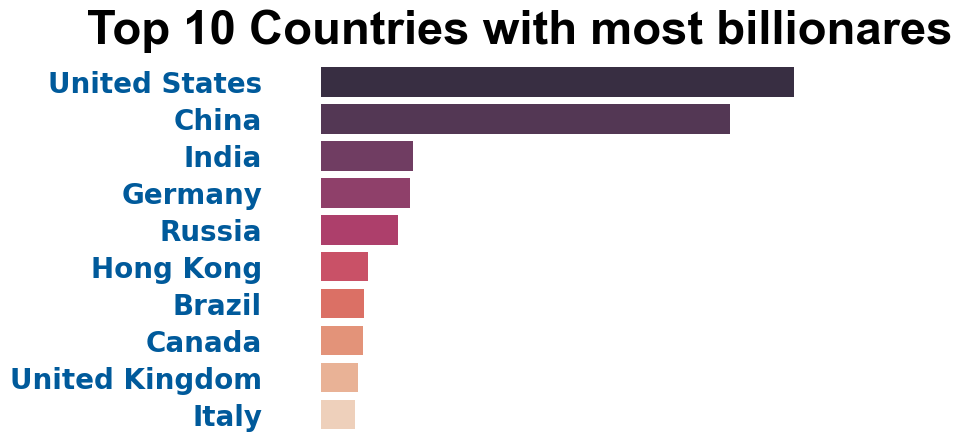

In [21]:
Countries = df2.country.value_counts().head(10).index.tolist()

sns.countplot(data=df2, y='country', orient='h', order=df2.country.value_counts().head(10).index, palette='rocket', alpha=0.9)
sns.despine(left=True, bottom=True)

plt.title('Top 10 Countries with most billionares', size=34, weight="bold",x=0.40, family = "Arial", y=1.03)
plt.ylabel("")
plt.xlabel("")
plt.yticks(size=20, weight="bold", x=-0.1, color="#005a9b")
plt.xticks([])
plt.tick_params(left=False)




**How many of the billionares are self made?**

In [31]:
df2.selfmade.value_counts(dropna=False)

True     1960
False     795
Name: selfmade, dtype: int64

In [32]:
df2.selfmade.value_counts(dropna=False, normalize=True).mul(100)

True     71.143376
False    28.856624
Name: selfmade, dtype: float64

[Text(0, 0, '795'), Text(0, 0, '1960')]

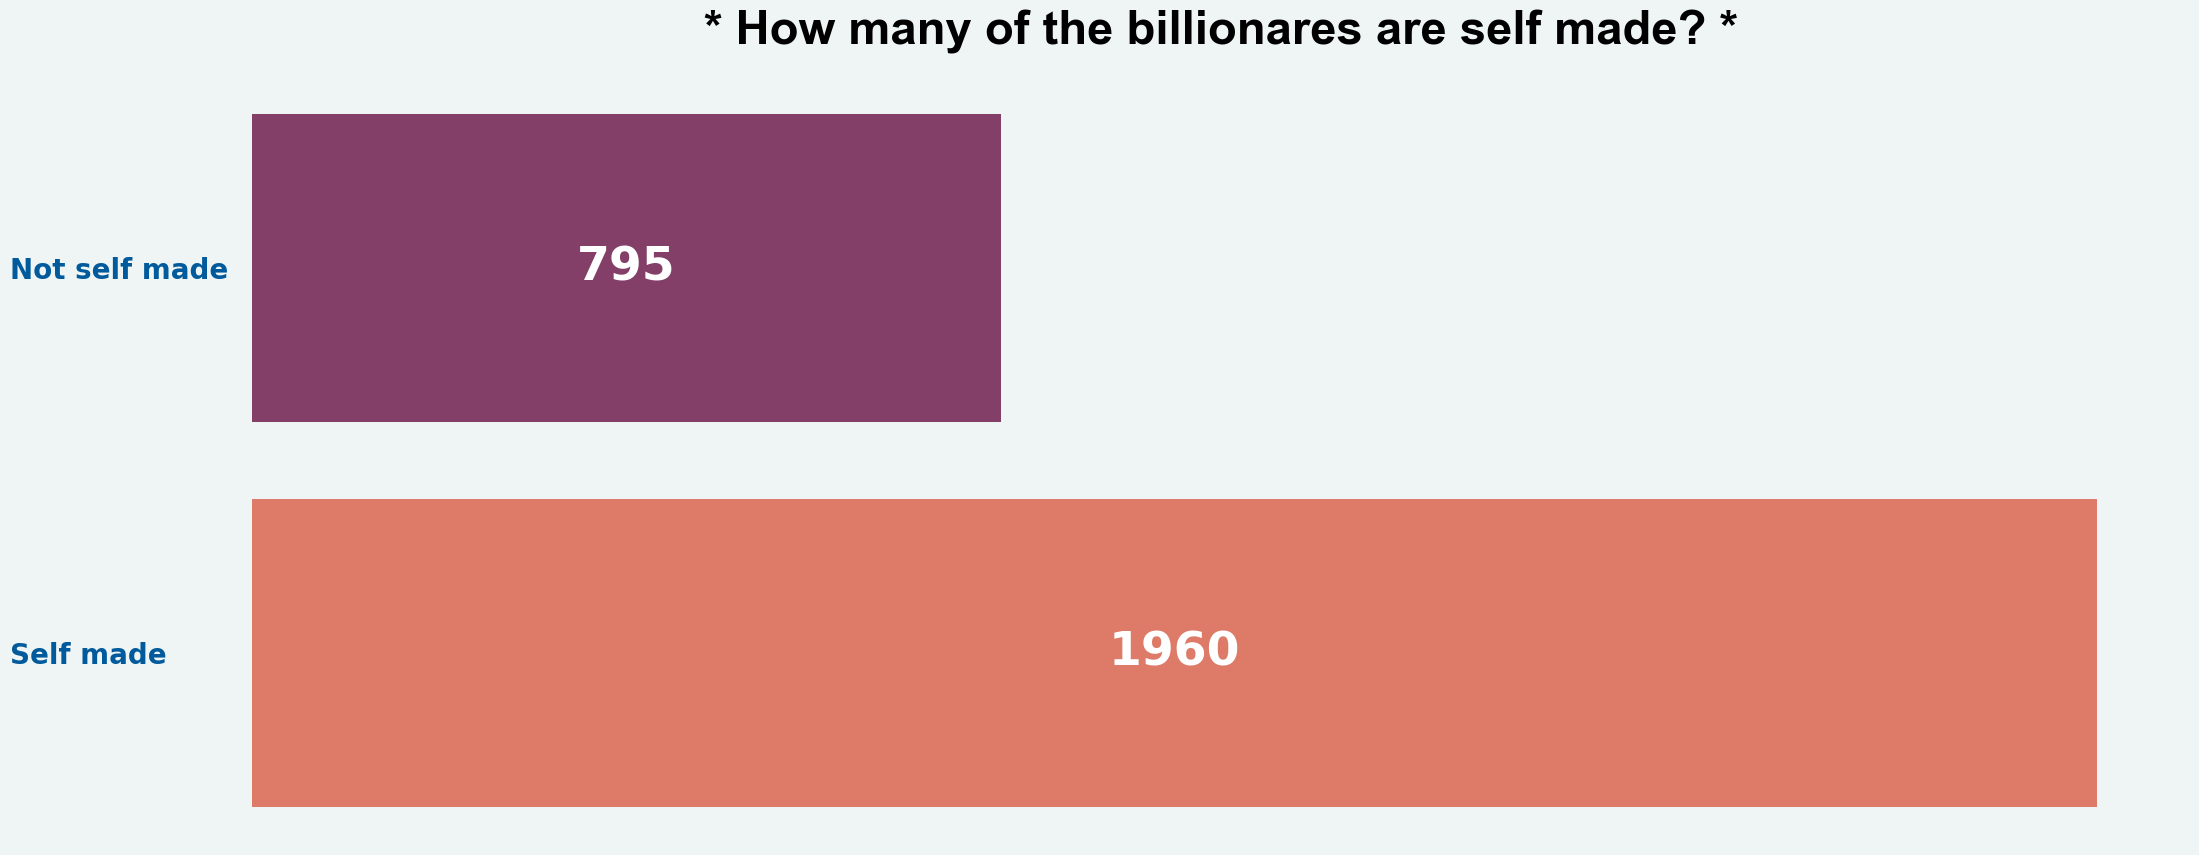

In [34]:
fig, ax = plt.subplots(figsize=(25, 10), facecolor='#EFF5F5')

sns.countplot(data=df2, y='selfmade', orient='h', palette='rocket', alpha=0.9)
sns.despine(left=True, bottom=True)

plt.title('* How many of the billionares are self made? *', size=34, weight="bold", family = "Arial", y=1.03)
plt.ylabel("")
plt.xlabel("")
plt.yticks([False, True],['Not self made', 'Self made'],size=20, weight="bold", color="#005a9b", ha='left', x=-0.12)
plt.xticks([])
plt.tick_params(left=False)

ax.set_facecolor('#EFF5F5')
ax.bar_label(container=ax.containers[0],size=34,weight="bold",color='white',label_type='center')